# The Recommender Engine Pool

*What is a recommender engine pool?*


The recommender engine pool is the data source from which the recommender engine gets its recommendations. It is made up of the (1)items considered for the recommendation and (2) measure/s that determines its fitness to be recommended.

We will create a Spotify track recommendation pool based on its genre.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Tracks Genre Classification - multiple genres

This is similar to the previous notebook, but this time, we will predict more than 2 genres

### 1. Read and check values of multiple playlist sets

In [2]:
#genre_names = ["R&B", "Classical", "Country", "Electronic", "Hiphop","Jazz", "Pop", "Rock", "Reggae", "Rap"]
genre_names = ["R&B", "Classical", "Country", "Electronic","Jazz", "Reggae", "Rock", "Rap"]

playlist_df_list = []
track_df_list = []
for genre in genre_names:
    # read and process the playlist data for keyword
    print(genre)
    pdf = pd.read_csv('data/playlists/'+genre.lower()+'_playlist_data.csv')
    pdf['genre'] = genre.lower().replace('&','n')
    playlist_df_list.append(pdf)

    tdf = pd.read_csv('data/playlists/'+genre.lower()+'_playlist_tracks_data.csv')
    tdf['genre'] = genre.lower().replace('&','n')
    tdf = tdf.drop(columns=['playlist_name'])
    tdf = tdf.merge(pdf[['playlist_id','playlist_name']], on=['playlist_id'], how='left')
    
    track_df_list.append(tdf)
        
playlist_df = pd.concat(playlist_df_list)
tracks_df = pd.concat(track_df_list)

R&B
Classical
Country
Electronic
Jazz
Reggae
Rock
Rap


In [3]:
tracks_df.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'artist_id', 'artist_name',
       'album_id', 'duration', 'release_date', 'popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_id',
       'genre', 'playlist_name'],
      dtype='object')

In [4]:
tracks_df['genre'].value_counts()

jazz          4465
electronic    2150
rock          2131
country       2060
reggae        1711
classical     1701
rap           1475
rnb           1378
Name: genre, dtype: int64

In [5]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(13040, 23)

In [6]:
tracks_df['genre'].value_counts()

jazz          2342
rock          1874
electronic    1872
country       1596
classical     1536
reggae        1333
rap           1309
rnb           1178
Name: genre, dtype: int64

In [7]:
#check shape
playlist_df.shape, tracks_df.shape

((713, 7), (13040, 23))

In [8]:
#check columns
print("Playlist dataset columns: %s \n" % playlist_df.columns.values)
print("Tracks dataset columns: %s" % tracks_df.columns.values)

Playlist dataset columns: ['playlist_id' 'playlist_name' 'playlist_total_tracks' 'owner_id'
 'owner_name' 'total_followers' 'genre'] 

Tracks dataset columns: ['Unnamed: 0' 'track_id' 'track_name' 'artist_id' 'artist_name' 'album_id'
 'duration' 'release_date' 'popularity' 'danceability' 'energy' 'key'
 'loudness' 'mode' 'speechiness' 'acousticness' 'instrumentalness'
 'liveness' 'valence' 'tempo' 'playlist_id' 'genre' 'playlist_name']


array([[<AxesSubplot:title={'center':'total_followers'}>]], dtype=object)

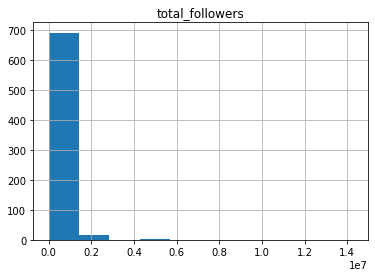

In [9]:
# What is the distribution of playlist's total tracks?
playlist_df[['total_followers']].hist()

## 2. Refine the training data

In [10]:
#get top 5 playlists per genre
#head will show top 5 followers since csv is already ordered
top_playlists_df = playlist_df.groupby('genre').head(5)
top_playlists_df

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers,genre
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3759509,rnb
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2762610,rnb
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2188378,rnb
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,1175872,rnb
4,37i9dQZF1EQoqCH7BwIYb7,R&B Mix,50,spotify,Spotify,883491,rnb
0,37i9dQZF1DWWEJlAGA9gs0,Classical Essentials,148,spotify,Spotify,2573405,classical
1,37i9dQZF1DWV0gynK7G6pD,Classical New Releases,46,spotify,Spotify,621261,classical
2,37i9dQZF1DX9G9wwzwWL2k,Epic Classical,66,spotify,Spotify,483342,classical
3,37i9dQZF1DWUvHZA1zLcjW,Chilled Classical,90,spotify,Spotify,432616,classical
4,37i9dQZF1DX8Sz1gsYZdwj,Classical Sleep,53,spotify,Spotify,407129,classical


In [11]:
tracks_df = tracks_df[tracks_df['playlist_id'].isin(top_playlists_df['playlist_id'].values)]
tracks_df['genre'].value_counts()

jazz          816
country       496
electronic    472
rock          465
classical     387
rap           351
reggae        340
rnb           278
Name: genre, dtype: int64

> Q: Given the number of genres for prediction, what minimum accuracy value can we expect from the model?

In [13]:
1/8

0.125

## 3. Feature Engineering

##### Conversions/Scaling

In [14]:
#convert duration from ms to mins
tracks_df['duration_mins']=tracks_df['duration']/60000

In [15]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler #RobustScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()

count    3605.000000
mean        0.786676
std         0.149183
min         0.000000
25%         0.735359
50%         0.839011
75%         0.889020
max         1.000000
Name: loudness, dtype: float64

In [16]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    3605.000000
mean        0.540704
std         0.139693
min         0.000000
25%         0.425277
50%         0.547063
75%         0.626417
max         1.000000
Name: tempo, dtype: float64

###### Categorical Encoding

In [17]:
tracks_df["genre"] = tracks_df["genre"].astype('category')
tracks_df.dtypes

Unnamed: 0             int64
track_id              object
track_name            object
artist_id             object
artist_name           object
album_id              object
duration               int64
release_date          object
popularity             int64
danceability         float64
energy               float64
key                    int64
loudness             float64
mode                   int64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
playlist_id           object
genre               category
playlist_name         object
duration_mins        float64
dtype: object

In [18]:
tracks_df['genre'].value_counts()

jazz          816
country       496
electronic    472
rock          465
classical     387
rap           351
reggae        340
rnb           278
Name: genre, dtype: int64

In [19]:
tracks_df['genre_id'] = tracks_df["genre"].cat.codes
tracks_df.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,genre,playlist_name,duration_mins,genre_id
0,0,2c7huQpWR29bcXrrvLcG2j,We Need A Resolution (feat. Timbaland),0urTpYCsixqZwgNTkPJOJ4,Aaliyah,0cNaDPtbHC1PMJMRTY2GFc,242826,2001-07-07,64,0.728,...,0.3000,0.000000,0.113,0.824,0.687742,37i9dQZF1DWYmmr74INQlb,rnb,I Love My '00s R&B,4.047100,6
1,1,0ceeRNqbOzRiGE42KWSrRa,Into You (feat. Fabolous),0le01dl1WllSHhjEXRl4in,Tamia,43QuYbSfbTjcsghwJyUnyP,294093,2004-04-05,61,0.677,...,0.2190,0.000000,0.173,0.570,0.425740,37i9dQZF1DWYmmr74INQlb,rnb,I Love My '00s R&B,4.901550,6
2,2,4iuNZTcvT9diFySSzVsnVS,When I See U,7xAcVHPiirnUqfdqo0USb1,Fantasia,42DybH3gl3WcfXAQySOEiX,217346,2006-12-09,71,0.569,...,0.4520,0.000079,0.205,0.754,0.435231,37i9dQZF1DWYmmr74INQlb,rnb,I Love My '00s R&B,3.622433,6
4,4,2RqZFOLOnzVmHUX7ZMcaES,Let It Go,1vfezMIyCr4XUdYRaKIKi3,Keyshia Cole,7mdy09EO4q6F9VWBtXDDjK,238333,2007-01-01,67,0.806,...,0.1970,0.000000,0.209,0.781,0.443792,37i9dQZF1DWYmmr74INQlb,rnb,I Love My '00s R&B,3.972217,6
5,5,6nTcn8CybBcx0t7IaXEJ6O,Thank God I Found You (feat. Joe & Nas) - Make...,4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,6zuCJaxmHKNKN5hMDF556U,251640,2000-04-18,60,0.608,...,0.0129,0.000000,0.332,0.366,0.786069,37i9dQZF1DWYmmr74INQlb,rnb,I Love My '00s R&B,4.194000,6


In [25]:
tracks_df[['genre_id','genre']].drop_duplicates().set_index('genre_id').to_dict()['genre']

{6: 'rnb',
 0: 'classical',
 1: 'country',
 2: 'electronic',
 3: 'jazz',
 5: 'reggae',
 7: 'rock',
 4: 'rap'}

In [20]:
genre_lookup = dict(tracks_df.groupby('genre_id').head(1)[['genre_id','genre']].sort_values('genre_id').values)
genre_lookup

{0: 'classical',
 1: 'country',
 2: 'electronic',
 3: 'jazz',
 4: 'rap',
 5: 'reggae',
 6: 'rnb',
 7: 'rock'}

In [27]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report,\
    ConfusionMatrixDisplay, plot_roc_curve

Select audio features to use for the model

In [28]:
# create feature matrix (X)
# pick energy and tempo as features
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']
print(len(X),len(y))

3605 3605


## 5. Model Tuning: kNN

Perform KNN using K= [2..50] and validate using k-fold = 5

In [29]:
#check indices used in folds
KFOLDS=5
kf = KFold(n_splits=KFOLDS)
for i,(train, test) in enumerate(kf.split(X)):
    #generate indices to use for the k-fold splits
    full_range = np.arange(len(X)).tolist()
    gap = [x for x in full_range if x not in train]
    if (i>0)&(i<KFOLDS-1):
        print("K=%d, train idx: %d-%d, %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), min(gap), max(gap), max(train),len(train),\
                                                                     min(test), max(test), len(test)))
    else:
         print("K=%d, train idx: %d-%d (n=%d), test idx:  %d-%d (n=%d)" % (i, min(train), max(train),len(train),\
                                                                     min(test), max(test), len(test)))

K=0, train idx: 721-3604 (n=2884), test idx:  0-720 (n=721)
K=1, train idx: 0-721, 1441-3604 (n=2884), test idx:  721-1441 (n=721)
K=2, train idx: 0-1442, 2162-3604 (n=2884), test idx:  1442-2162 (n=721)
K=3, train idx: 0-2163, 2883-3604 (n=2884), test idx:  2163-2883 (n=721)
K=4, train idx: 0-2883 (n=2884), test idx:  2884-3604 (n=721)


In [30]:
n_neighbors = np.arange(2,51)
KFOLDS = 5

cv_scores_mean = []
cv_scores_std = []

for K in n_neighbors:
    print('Fitting KNN with K=%d ...' % K, end='')
    #initialize model
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # get accuracy metric across train-test sets generated using k-folds
    scores = cross_val_score(knn_model, X, y, cv=KFOLDS, scoring='accuracy')
    # overall accuracy score of K is mean of accuracy scores per k-fold
    # std dev of scores across folds must be a minimum
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())
    print('DONE!')

Fitting KNN with K=2 ...DONE!
Fitting KNN with K=3 ...DONE!
Fitting KNN with K=4 ...DONE!
Fitting KNN with K=5 ...DONE!
Fitting KNN with K=6 ...DONE!
Fitting KNN with K=7 ...DONE!
Fitting KNN with K=8 ...DONE!
Fitting KNN with K=9 ...DONE!
Fitting KNN with K=10 ...DONE!
Fitting KNN with K=11 ...DONE!
Fitting KNN with K=12 ...DONE!
Fitting KNN with K=13 ...DONE!
Fitting KNN with K=14 ...DONE!
Fitting KNN with K=15 ...DONE!
Fitting KNN with K=16 ...DONE!
Fitting KNN with K=17 ...DONE!
Fitting KNN with K=18 ...DONE!
Fitting KNN with K=19 ...DONE!
Fitting KNN with K=20 ...DONE!
Fitting KNN with K=21 ...DONE!
Fitting KNN with K=22 ...DONE!
Fitting KNN with K=23 ...DONE!
Fitting KNN with K=24 ...DONE!
Fitting KNN with K=25 ...DONE!
Fitting KNN with K=26 ...DONE!
Fitting KNN with K=27 ...DONE!
Fitting KNN with K=28 ...DONE!
Fitting KNN with K=29 ...DONE!
Fitting KNN with K=30 ...DONE!
Fitting KNN with K=31 ...DONE!
Fitting KNN with K=32 ...DONE!
Fitting KNN with K=33 ...DONE!
Fitting KNN with

Choose optimal value of K

The optimal number of neighbors is 23.00 with accuracy 0.6252


Text(0, 0.5, 'Accuracy standard deviation')

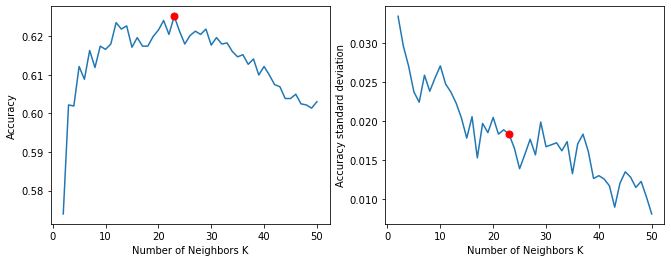

In [31]:
# determining best K
idx_max_accuracy = cv_scores_mean.index(max(cv_scores_mean))
optimal_K = n_neighbors[idx_max_accuracy]
print("The optimal number of neighbors is %0.2f with accuracy %0.4f" % (optimal_K, cv_scores_mean[idx_max_accuracy]))

# plot metrics 
fig,axs = plt.subplots(1,2, figsize=(11,4))
axs[0].plot(n_neighbors, cv_scores_mean)
axs[0].plot(optimal_K,max(cv_scores_mean), marker="o", ms=7, color='r')
axs[0].set_xlabel("Number of Neighbors K")
axs[0].set_ylabel("Accuracy")

axs[1].plot(n_neighbors, cv_scores_std)
axs[1].plot(optimal_K,cv_scores_std[idx_max_accuracy], marker="o", ms=7, color='r')
axs[1].set_xlabel("Number of Neighbors K")
axs[1].set_ylabel("Accuracy standard deviation")


Try out optimal model with entire length of the dataset

In [32]:
#initialize KNN with optimal K
knn_optimal_model = KNeighborsClassifier(n_neighbors=optimal_K)
# fitting the model with entire dataset
knn_optimal_model.fit(X, y)
#use model to predict y
knn_ypred = knn_optimal_model.predict(X)

Create a classification report

In [33]:
# evaluate accuracy
acc = accuracy_score(y, knn_ypred) * 100
print('\nThe accuracy of the knn classifier for the full dataset using k = %d is %f%%' % (optimal_K, acc))


The accuracy of the knn classifier for the full dataset using k = 23 is 67.988904%


## 6. Model Tuning: SVM

Fit a **linear** kernel

In [34]:
def plot_scores(cv_scores_mean,cv_scores_std):
    fig,axs = plt.subplots(1,2, figsize=(11,4))
    
    x = np.arange(len(cv_scores_mean))
    max_mean_score_idx = cv_scores_mean.argmax()
    
    axs[0].plot(x, cv_scores_mean, marker='.', lw=0)
    axs[0].plot(x[max_mean_score_idx],max(cv_scores_mean), marker="o", ms=7, color='r')
    axs[0].set_xlabel("Model config type")
    axs[0].set_ylabel("Accuracy")

    axs[1].plot(x, cv_scores_std, marker='.', lw=0)
    axs[1].plot(x[max_mean_score_idx],cv_scores_std[max_mean_score_idx], marker="o", ms=7, color='r')
    axs[1].set_xlabel("Model config type")
    axs[1].set_ylabel("Accuracy standard deviation")


In [35]:
#Linear model
print('Fitting SVM with linear kernel...')

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS )
# fitting the model for grid search
grid.fit(X, y)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model1 = grid.best_estimator_
# fit model for entire data
svm_model1.fit(X, y)
pred1 = svm_model1.predict(X)
acc = accuracy_score(y, pred1) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with linear kernel...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best model config score is 63.855756% (vs. overall mean score: 60.804438 )
Std of best model score across folds is 0.019410 (vs. overall mean std: 0.020415 )
The accuracy of the SVM classifier for the full dataset is 68.432732%
DONE!


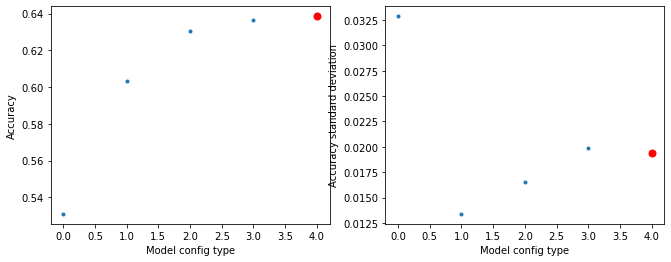

In [36]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **polynomial** kernel

In [37]:
# defining parameter range
print('Fitting SVM with a polynomial kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2,3,5],
              'kernel': ['poly']}
#1 worker:  12 mins
#2 workers: 8.6 mins
#3 workers: 7.1 mins
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model2 = grid.best_estimator_
# fit model for entire data
svm_model2.fit(X, y)
pred2 = svm_model2.predict(X)
acc = accuracy_score(y, pred2) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with a polynomial kernel...
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best model is SVC(C=1000, degree=2, gamma=1, kernel='poly')
Best model config score is 66.934813% (vs. overall mean score: 37.153213 )
Std of best model score across folds is 0.038533 (vs. overall mean std: 0.011851 )
The accuracy of the SVM classifier for the full dataset is 75.090153%
DONE!


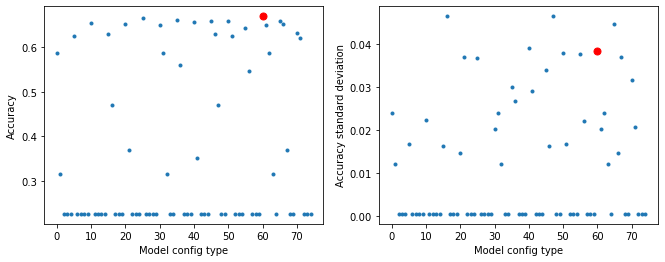

In [38]:
plot_scores(cv_scores_mean,cv_scores_std)

Fit a **radial** kernel

In [39]:
# defining parameter range
print('Fitting SVM with an rbf kernel...')

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1, cv = KFOLDS, n_jobs=2)
# fitting the model for grid search
grid.fit(X, y)
print('Best model is %s' % grid.best_estimator_)

#get scores
cv_scores_mean =  grid.cv_results_['mean_test_score']
cv_scores_std = grid.cv_results_['std_test_score']
max_mean_score_idx = cv_scores_mean.argmax()

print('Best model config score is %f%% (vs. overall mean score: %f )' % (100*cv_scores_mean[max_mean_score_idx],
                                                                        100*np.mean(cv_scores_mean)))
print('Std of best model score across folds is %f (vs. overall mean std: %f )' %\
      (cv_scores_std[max_mean_score_idx], np.mean(cv_scores_std)))

# get best model
svm_model3 = grid.best_estimator_
# fit model for entire data
svm_model3.fit(X, y)
pred3 = svm_model3.predict(X)
acc = accuracy_score(y, pred3) * 100
print('The accuracy of the SVM classifier for the full dataset is %f%%' % (acc))
print('DONE!')

Fitting SVM with an rbf kernel...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best model is SVC(C=100, gamma=1)
Best model config score is 66.907074% (vs. overall mean score: 48.593620 )
Std of best model score across folds is 0.036576 (vs. overall mean std: 0.023403 )
The accuracy of the SVM classifier for the full dataset is 78.557559%
DONE!


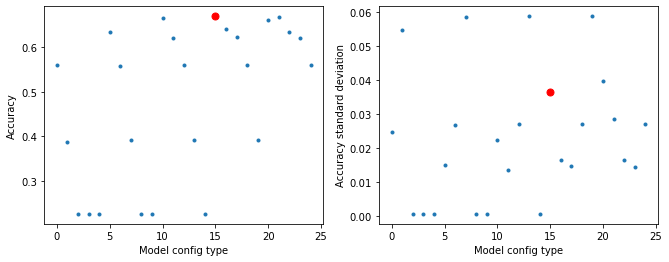

In [40]:
plot_scores(cv_scores_mean,cv_scores_std)

Select best SVM model

In [58]:
svm_optimal_model = svm_model3
#set probability=True to view classification probabilities and refit
svm_optimal_model.probability=True
svm_optimal_model.fit(X, y)
#use model to predict y
svm_ypred = svm_optimal_model.predict(X)

## 7. Model Selection

>Q: Which between KNN and SVM performed better? 

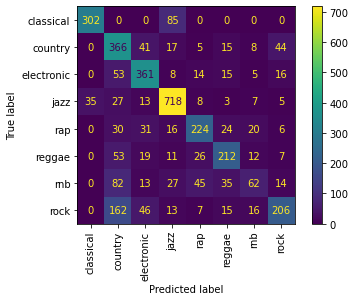

In [59]:
cm = confusion_matrix(y, knn_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

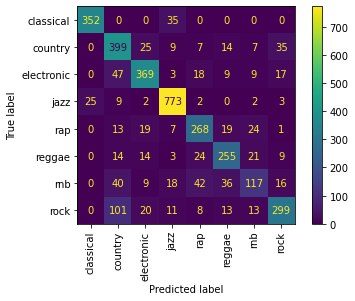

In [60]:
cm = confusion_matrix(y, svm_ypred)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(genre_lookup.values()))
cmd.plot(xticks_rotation=90)

In [61]:
genre_lookup

{0: 'classical',
 1: 'country',
 2: 'electronic',
 3: 'jazz',
 4: 'rap',
 5: 'reggae',
 6: 'rnb',
 7: 'rock'}

In [62]:
print('-------------------------------------------------------------')
print('KNN')
print(classification_report(y,knn_ypred))
print('-------------------------------------------------------------')
print('SVM')
print(classification_report(y,svm_ypred))

-------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       387
           1       0.47      0.74      0.58       496
           2       0.69      0.76      0.72       472
           3       0.80      0.88      0.84       816
           4       0.68      0.64      0.66       351
           5       0.66      0.62      0.64       340
           6       0.48      0.22      0.30       278
           7       0.69      0.44      0.54       465

    accuracy                           0.68      3605
   macro avg       0.67      0.64      0.64      3605
weighted avg       0.69      0.68      0.67      3605

-------------------------------------------------------------
SVM
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       387
           1       0.64      0.80      0.71       496
           2       0.81      0.78      0.79       472


Choose optimal model among those above

In [63]:
optimal_model = svm_optimal_model

## 8. Create recommender engine pool with predicted genres and probabilities

**Out-of-sample**

Check if best model correctly predicts the genre of a track in the Top 200 charts (assuming most are not in the playlist data). User may validate the results subjectively as a listener, or refer to another source by looking up the track in a genre-tagging site(e.g. https://www.chosic.com/music-genre-finder/)

In [64]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df = chart_tracks_df.dropna().reset_index(drop=True)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,72,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,82,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,82,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,68,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [65]:
#scale loudness and tempo
chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])

In [66]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  optimal_model.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre'] = chart_tracks_df['predicted_genre_id'].apply(lambda x: genre_lookup[x])
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df['all_genre_prob'] = chart_tracks_df.apply(lambda x:  optimal_model.predict_proba(x[feature_cols].values.reshape(1,-1))[0]\
                                                    , axis=1)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  w

In [67]:
#explode genre probabilities into separate columns
charts_predicted_genre_prob = pd.DataFrame(chart_tracks_df["all_genre_prob"].to_list(),
                                           columns=['predicted_'+g+'_prob' for g in genre_lookup.values()])
charts_predicted_genre_prob['track_id'] = chart_tracks_df['track_id']
chart_tracks_df = pd.merge(chart_tracks_df,charts_predicted_genre_prob, how='left', on='track_id')
chart_tracks_df = chart_tracks_df.drop(columns='all_genre_prob')
chart_tracks_df = chart_tracks_df.sort_values('predicted_genre_prob', ascending=False)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
695,4Q3d0fDDg6l9sqlAMVumgJ,Dumb Stuff,49tQo2QULno7gxHutgccqF,LANY,0HiwsXForePsWdIZW6EEkK,152248,2017-06-30,43,0.431,0.894,...,rock,0.998026,0.000030,0.000356,0.000285,0.000324,0.000044,0.000036,0.000899,0.998026
3702,6qS0J555KgzxQ01E8x6vux,Swimming Pool - feat. Chito Miranda,4DAcJXcjX0zlQAZAPAx4Zb,Ben&Ben,0UeeygFdIo8k7PgxpLEGWI,217491,2021-08-29,48,0.225,0.852,...,rock,0.995345,0.000095,0.000734,0.002982,0.000515,0.000067,0.000018,0.000244,0.995345
100,4Z3qm2aWGTJuJKnv3EWwyD,Hide Away,6Dd3NScHWwnW6obMFbl1BH,Daya,2cE2eOy7alOZHpuelJEV8Q,192386,2017-01-06,43,0.886,0.818,...,reggae,0.994993,0.000467,0.000181,0.000153,0.000032,0.001043,0.994993,0.002944,0.000186
125,6Qyc6fS4DsZjB2mRW9DsQs,Iris,2sil8z5kiy4r76CRTXxBCA,The Goo Goo Dolls,4UMjBXcRqIgMZ1XumU2x5T,289533,1998-09-11,81,0.315,0.715,...,rock,0.994219,0.000033,0.001043,0.003540,0.000624,0.000173,0.000013,0.000355,0.994219
2715,0GGfPhGuWC2JGc7hlvjLXa,Alapaap,7374lH6kwx9uQATYQ9H3Cp,Eraserheads,1IalzI8USuu4PB679HVV5C,263000,1994-11-01,55,0.331,0.749,...,rock,0.992889,0.000074,0.000864,0.004801,0.000383,0.000411,0.000027,0.000550,0.992889


In [68]:
chart_tracks_df[['track_name']+[c for c in chart_tracks_df.columns if 'predicted_' in c]]

,track_name,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
695,Dumb Stuff,7,rock,0.998026,0.000030,0.000356,0.000285,0.000324,0.000044,0.000036,0.000899,0.998026
3702,Swimming Pool - feat. Chito Miranda,7,rock,0.995345,0.000095,0.000734,0.002982,0.000515,0.000067,0.000018,0.000244,0.995345
100,Hide Away,5,reggae,0.994993,0.000467,0.000181,0.000153,0.000032,0.001043,0.994993,0.002944,0.000186
125,Iris,7,rock,0.994219,0.000033,0.001043,0.003540,0.000624,0.000173,0.000013,0.000355,0.994219
2715,Alapaap,7,rock,0.992889,0.000074,0.000864,0.004801,0.000383,0.000411,0.000027,0.000550,0.992889
...,...,...,...,...,...,...,...,...,...,...,...,...
3173,Prisoner (feat. Dua Lipa),2,electronic,0.203005,0.002443,0.181387,0.203005,0.005142,0.078008,0.189274,0.200253,0.140489
3659,Anytime,2,electronic,0.202146,0.004547,0.127117,0.174707,0.023777,0.146663,0.125309,0.195735,0.202146
1256,no tears left to cry,2,electronic,0.199815,0.004188,0.173938,0.184737,0.006493,0.199815,0.144381,0.123363,0.163086
374,Beauty and the Beast - Duet with Peabo Bryson ...,7,rock,0.199359,0.040884,0.168638,0.023733,0.171577,0.166465,0.032042,0.199359,0.197303


In [69]:
chart_tracks_df['predicted_genre'].value_counts()

reggae        993
rock          940
country       690
rap           639
jazz          529
electronic    233
rnb           170
classical      55
Name: predicted_genre, dtype: int64

<AxesSubplot:>

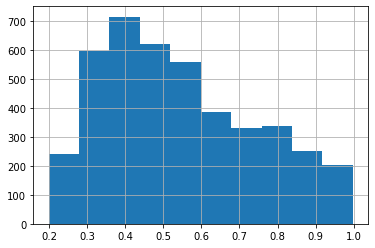

In [70]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

> Q: Can you identify tracks that were misclassfied by the model?
    Does it make sense that the model misclassfied the tracks given the model configuration? Why or why not?

In [71]:
#Check tracks classified with higher probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rock'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
695,Dumb Stuff,LANY,rock,0.998026
3702,Swimming Pool - feat. Chito Miranda,Ben&Ben,rock,0.995345
125,Iris,The Goo Goo Dolls,rock,0.994219
2715,Alapaap,Eraserheads,rock,0.992889
4213,Tek It,Cafuné,rock,0.992748
1080,Dreams,The Cranberries,rock,0.988210
3100,Ghosting,TOMORROW X TOGETHER,rock,0.987917
2443,Christmas (Baby Please Come Home),Darlene Love,rock,0.983840
1907,Take That Man,IV Of Spades,rock,0.982081
4176,Jopay,Mayonnaise,rock,0.981947


In [72]:
#Check tracks classified with lower probability
chart_tracks_df[chart_tracks_df['predicted_genre']=='rnb'][['track_name','artist_name','predicted_genre','predicted_genre_prob']]\
            .sort_values(['predicted_genre_prob'],ascending=False)[:10]

,track_name,artist_name,predicted_genre,predicted_genre_prob
2970,Mood Swings (feat. Lil Tjay),Pop Smoke,rnb,0.644268
3382,deja vu,Olivia Rodrigo,rnb,0.621011
2170,Undecided,Chris Brown,rnb,0.614007
3490,deja vu,Olivia Rodrigo,rnb,0.603405
3718,Jonah,Kanye West,rnb,0.585785
3542,Butter,BTS,rnb,0.549536
3489,Butter,BTS,rnb,0.549536
4008,Butter,BTS,rnb,0.549536
2231,boyfriend (with Social House),Ariana Grande,rnb,0.535190
3474,good 4 u,Olivia Rodrigo,rnb,0.499062


>Q **Spot Check**: Check out a song you're familiar with and see if the predicted genres and probabilities makes sense

In [75]:
chart_tracks_df[chart_tracks_df['track_name'].str.contains('Bohemian')]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_jazz_prob,predicted_rap_prob,predicted_reggae_prob,predicted_rnb_prob,predicted_rock_prob
1725,7tFiyTwD0nx5a1eklYtX2J,Bohemian Rhapsody - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,6X9k3hSsvQck2OfKYdBbXr,354320,1975-11-21,71,0.392,0.402,...,rock,0.849842,0.000632,0.011485,0.005106,0.051285,0.014992,0.001924,0.064733,0.849842
2003,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - Remastered 2011,1dfeR4HaWDbWqFHLkxsg1d,Queen,1GbtB4zTqAsyfZEsm1RZfx,354320,1975-11-21,79,0.414,0.404,...,rap,0.228126,0.034997,0.097200,0.026176,0.146786,0.195899,0.052051,0.228126,0.218766


In [74]:
#save data
chart_tracks_df.to_csv("data/spotify_daily_charts_tracks_rec_pool.csv", index=False, encoding='utf-8')

## Caveats
1. Using playlist names as genre tags heavily rely on *user opinion* and not *extracted music features* (compare this from the methods used in the [GTZAN genre collection dataset](https://data-flair.training/blogs/python-project-music-genre-classification/)
2. Playlists with dual genre names exists, and appear quite often in the dataset (e.g. Electronic Pop, Classical Rock)
3. Although a dominant genre could be readily observed, recent music tend to incorporate many genres at a time and thus create less distinction when the model looks at the audio features.

>Q: What other caveats could you deduce from the steps done above?


## Model Improvement
To enhance the model accuracy, try to do the following:
1. Pick "purer" top-followed playlists for the training data. A quick way to do this is to pick playlists that contain pre 2000's music as majority as these are less hybridized than more recent songs.
2. Try fewer but broader genres as categories (4-5 genres)
3. Remove outlier songs! These are the songs that dont fit its playlist's description. A bit subjective (and tedious!).
4. Limit the features used as predictors (could be inferred from the list of genres you're considering)
